In [1]:
%plot --format svg

In [2]:
setdefaults

# Roots: Open methods
## Newton-Raphson

First-order approximation for the location of the root (i.e. assume the slope at the given point is constant, what is the solution when f(x)=0)

$f'(x_{i})=\frac{f(x_{i})-0}{x_{i}-x_{i+1}}$

$x_{i+1}=x_{i}-\frac{f(x_{i})}{f'(x_{i})}$

Use Newton-Raphson to find solution when $e^{-x}=x$

Find x when $e^{-x}=x$

In [11]:
f= @(x) exp(-x)-x;
df= @(x) -exp(-x)-1;

x_i= 0;
x_r = x_i-f(x_i)/df(x_i)
error_approx = abs((x_r-x_i)/x_r)
x_i=x_r;


x_r =  0.50000
error_approx =  1


In [13]:
x_r = x_i-f(x_i)/df(x_i)
error_approx = abs((x_r-x_i)/x_r)
x_i=x_r;

x_r =  0.56714
error_approx =  0.0014673


In [14]:
x_r = x_i-f(x_i)/df(x_i)
error_approx = abs((x_r-x_i)/x_r)
x_i=x_r;

x_r =  0.56714
error_approx =    2.2106e-07


In [15]:
x_r = x_i-f(x_i)/df(x_i)
error_approx = abs((x_r-x_i)/x_r)
x_i=x_r;

x_r =  0.56714
error_approx =    5.0897e-15


## Create function `newtraph.m`

In [ ]:
function [root,ea,iter]=newtraph(func,dfunc,xr,es,maxit,varargin)
% newtraph: Newton-Raphson root location zeroes
% [root,ea,iter]=newtraph(func,dfunc,xr,es,maxit,p1,p2,...):
%   uses Newton-Raphson method to find the root of func
% input:
%   func = name of function
%   dfunc = name of derivative of function
%   xr = initial guess
%   es = desired relative error (default = 0.0001%)
%   maxit = maximum allowable iterations (default = 50)
%   p1,p2,... = additional parameters used by function
% output:
%   root = real root
%   ea = approximate relative error (%)
%   iter = number of iterations
if nargin<3,error('at least 3 input arguments required'),end
if nargin<4 || isempty(es),es=0.0001;end
if nargin<5 || isempty(maxit),maxit=50;end
iter = 0;
while (1)
  xrold = xr;
  xr = xr - func(xr)/dfunc(xr);
  iter = iter + 1;
  if xr ~= 0 
    ea = abs((xr - xrold)/xr) * 100;
  end
  if ea <= es || iter >= maxit, break, end
end
root = xr;

^C


In the freefall example, we created a function f(m) that when f(m)=0, then the mass had been chosen such that at t=4 s, the velocity is 36 m/s. 

$f(m)=\sqrt{\frac{gm}{c_{d}}}\tanh(\sqrt{\frac{gc_{d}}{m}}t)-v(t)$.

to use the Newton-Raphson method, we need the derivative $\frac{df}{dm}$

$\frac{df}{dm}=\frac{1}{2}\sqrt{\frac{g}{mc_{d}}}\tanh(\sqrt{\frac{gc_{d}}{m}}t)-
\frac{g}{2m}\mathrm{sech}^{2}(\sqrt{\frac{gc_{d}}{m}}t)$

In [17]:
setdefaults
g=9.81; % acceleration due to gravity
m=linspace(50, 200,100); % possible values for mass 50 to 200 kg
c_d=0.25; % drag coefficient
t=4; % at time = 4 seconds
v=36; % speed must be 36 m/s
f_m = @(m) sqrt(g*m/c_d).*tanh(sqrt(g*c_d./m)*t)-v; % anonymous function f_m
df_m = @(m) 1/2*sqrt(g./m/c_d).*tanh(sqrt(g*c_d./m)*t)-g/2./m*sech(sqrt(g*c_d./m)*t).^2;

In [21]:
[root,ea,iter]=newtraph(f_m,df_m,50,0.0001)

root =  142.74
ea =    1.8806e-04
iter =  50


# Thanks

## Secant Methods

Not always able to evaluate the derivative. Approximation of derivative:

$f'(x_{i})=\frac{f(x_{i-1})-f(x_{i})}{x_{i-1}-x_{i}}$

$x_{i+1}=x_{i}-\frac{f(x_{i})}{f'(x_{i})}$

$x_{i+1}=x_{i}-\frac{f(x_{i})}{\frac{f(x_{i-1})-f(x_{i})}{x_{i-1}-x_{i}}}=
    x_{i}-\frac{f(x_{i})(x_{i-1}-x_{i})}{f(x_{i-1})-f(x_{i})}$
    
What values should $x_{i}$ and $x_{i-1}$ take?

To reduce arbitrary selection of variables, use the

## Modified Secant method

Change the x evaluations to a perturbation $\delta$. 

$x_{i+1}=x_{i}-\frac{f(x_{i})(\delta x_{i})}{f(x_{i}+\delta x_{i})-f(x_{i})}$

In [11]:
[root,ea,iter]=mod_secant(f_m,1,50,0.00001)

root =  142.74
ea =    3.0615e-07
iter =  7


ans =    1.1185e+04


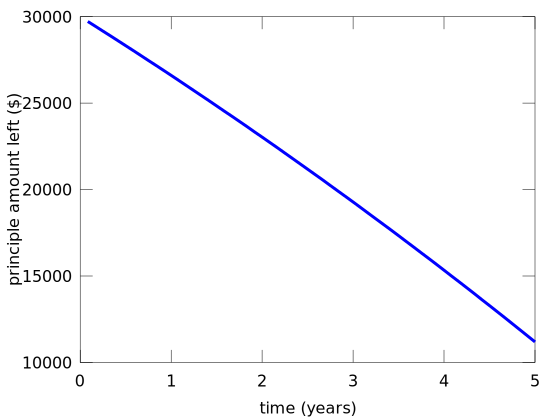

In [15]:
car_payments(400,30000,0.05,5,1)

Amt_numerical =  5467.0
ans =    3.9755e-04


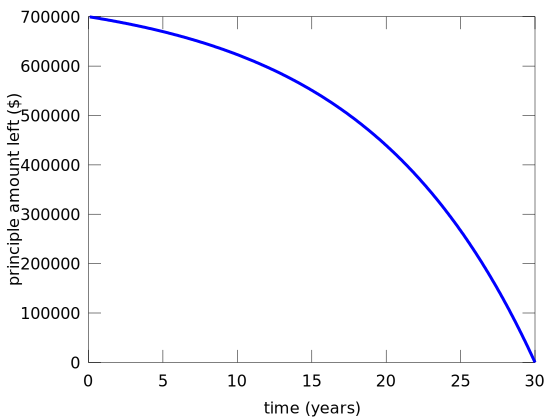

In [17]:
Amt_numerical=mod_secant(@(A) car_payments(A,700000,0.0875,30,0),1e-6,50,0.001)
car_payments(Amt_numerical,700000,0.0875,30,1)

In [18]:
Amt_numerical*12*30

ans =    1.9681e+06


## Amortization

Amortization calculation makes the same calculation for the monthly payment amount, A, paying off the principle amount, P, over n pay periods with monthly interest rate, r. 

In [19]:
% Amortization calculation
A  = @(P,r,n) P*(r*(1+r)^n)./((1+r)^n-1);
Amt=A(30000,0.05/12,5*12)

Amt =  566.14


## Matlab's function

Matlab and Octave combine bracketing and open methods in the `fzero` function. 

In [13]:
help fzero

'fzero' is a function from the file /usr/share/octave/4.0.0/m/optimization/fzero.m

 -- Function File: fzero (FUN, X0)
 -- Function File: fzero (FUN, X0, OPTIONS)
 -- Function File: [X, FVAL, INFO, OUTPUT] = fzero (...)
     Find a zero of a univariate function.

     FUN is a function handle, inline function, or string containing the
     name of the function to evaluate.

     X0 should be a two-element vector specifying two points which
     bracket a zero.  In other words, there must be a change in sign of
     the function between X0(1) and X0(2).  More mathematically, the
     following must hold

          sign (FUN(X0(1))) * sign (FUN(X0(2))) <= 0

     If X0 is a single scalar then several nearby and distant values are
     probed in an attempt to obtain a valid bracketing.  If this is not
     successful, the function fails.

     OPTIONS is a structure specifying additional options.  Currently,
     'fzero' recognizes these options: "FunValCheck", "OutputFcn",
     "TolX", "

In [20]:
fzero(@(A) car_payments(A,30000,0.05,5,0),500)

ans =  563.79


## Comparison of Solvers

It's helpful to compare to the convergence of different routines to see how quickly you find a solution. 

Comparing the freefall example


    __line__ at line 120 column 16
    line at line 56 column 8
    __plt__>__plt2vv__ at line 500 column 10
    __plt__>__plt2__ at line 246 column 14
    __plt__ at line 133 column 15
    semilogy at line 60 column 10


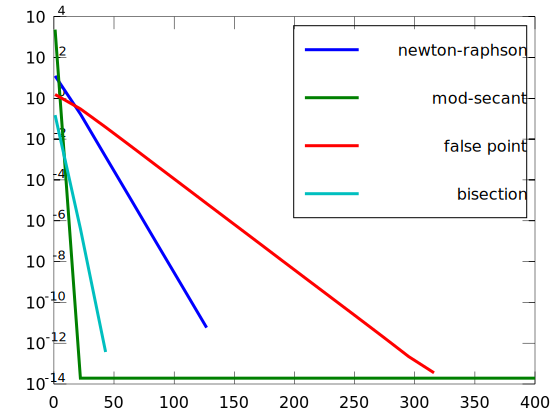

In [23]:
N=20;
iterations = linspace(1,400,N);
ea_nr=zeros(1,N); % appr error Newton-Raphson
ea_ms=zeros(1,N); % appr error Modified Secant
ea_fp=zeros(1,N); % appr error false point method
ea_bs=zeros(1,N); % appr error bisect method
for i=1:length(iterations)
    [root_nr,ea_nr(i),iter_nr]=newtraph(f_m,df_m,300,0,iterations(i));
    [root_ms,ea_ms(i),iter_ms]=mod_secant(f_m,1e-6,300,0,iterations(i));
    [root_fp,ea_fp(i),iter_fp]=falsepos(f_m,1,300,0,iterations(i));
    [root_bs,ea_bs(i),iter_bs]=bisect(f_m,1,300,0,iterations(i));
end

setdefaults
semilogy(iterations,abs(ea_nr),iterations,abs(ea_ms),iterations,abs(ea_fp),iterations,abs(ea_bs))
legend('newton-raphson','mod-secant','false point','bisection')

In [22]:
ea_nr

ea_nr =

 Columns 1 through 8:

   6.36591   0.06436   0.00052   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 9 through 16:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 17 through 20:

   0.00000   0.00000   0.00000   0.00000



    __line__ at line 120 column 16
    line at line 56 column 8
    __plt__>__plt2vv__ at line 500 column 10
    __plt__>__plt2__ at line 246 column 14
    __plt__ at line 133 column 15
    semilogy at line 60 column 10


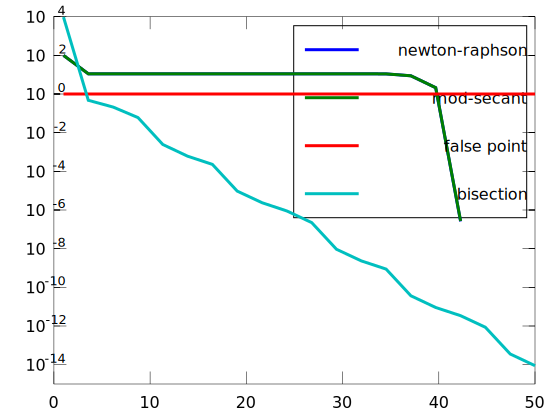

In [26]:
N=20;
f= @(x) x^10-1;
df=@(x) 10*x^9;
iterations = linspace(1,50,N);
ea_nr=zeros(1,N); % appr error Newton-Raphson
ea_ms=zeros(1,N); % appr error Modified Secant
ea_fp=zeros(1,N); % appr error false point method
ea_bs=zeros(1,N); % appr error bisect method
for i=1:length(iterations)
    [root_nr,ea_nr(i),iter_nr]=newtraph(f,df,0.5,0,iterations(i));
    [root_ms,ea_ms(i),iter_ms]=mod_secant(f,1e-6,0.5,0,iterations(i));
    [root_fp,ea_fp(i),iter_fp]=falsepos(f,0,5,0,iterations(i));
    [root_bs,ea_bs(i),iter_bs]=bisect(f,0,5,0,iterations(i));
end
        
semilogy(iterations,abs(ea_nr),iterations,abs(ea_ms),iterations,abs(ea_fp),iterations,abs(ea_bs))
legend('newton-raphson','mod-secant','false point','bisection')

In [27]:
ea_nr
newtraph(f,df,0.5,0,12)

ea_nr =

 Columns 1 through 7:

   99.03195   11.11111   11.11111   11.11111   11.11111   11.11111   11.11111

 Columns 8 through 14:

   11.11111   11.11111   11.11111   11.11109   11.11052   11.10624   10.99684

 Columns 15 through 20:

    8.76956    2.12993    0.00000    0.00000    0.00000    0.00000

ans =  16.208
